In [2]:
import pandas as pd
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.duplicated().any()

True

In [ ]:
data = df.drop_duplicates()

In [ ]:
data.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [ ]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [ ]:
data["fbs"].unique()

array([1, 0], dtype=int64)

In [ ]:
data["restecg"].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
print(cate_val)
print(cont_val)

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']


In [ ]:
# new_data={
#     "cp_0" : [0,1],
#     "cp_1" : [0,1],
#     "cp_2" : [0,1],
#     "cp_3" : [0,1],

# }
# new_data=pd.DataFrame(new_data)

In [ ]:

cate_val.remove('sex')
cate_val.remove('output')

In [ ]:
data = pd.get_dummies(data, columns=cate_val)

In [ ]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,1,130,250,187,3.5,1,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,41,0,130,204,172,1.4,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,56,1,120,236,178,0.8,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
4,57,0,120,354,163,0.6,1,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SC = StandardScaler()

In [ ]:
data[cont_val] = SC.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,False,True,False,...,True,True,False,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,True,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
data.corr()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
age,1.000000,-0.094962,0.283121,0.207216,-0.395235,0.206040,-0.221476,0.133521,-0.150921,-0.050494,...,-0.187581,-0.360596,0.177199,0.225501,0.161547,-0.085556,-1.735979e-02,0.062601,-0.131350,0.106699
sex,-0.094962,1.000000,-0.057647,-0.195571,-0.046439,0.098322,-0.283609,0.091960,-0.040290,-0.120731,...,-0.016802,-0.120583,0.097971,-0.019737,0.067417,0.079090,-3.193360e-02,0.141826,-0.379223,0.323934
trtbps,0.283121,-0.057647,1.000000,0.125256,-0.048023,0.194600,-0.146269,0.022626,-0.081359,-0.047212,...,-0.088942,-0.053735,-0.058894,0.088883,0.080456,0.010885,-1.677599e-02,0.076697,-0.142033,0.110668
chol,0.207216,-0.195571,0.125256,1.000000,-0.005308,0.050086,-0.081437,0.066681,-0.014828,-0.030957,...,-0.023315,-0.086399,0.016451,0.058357,0.097674,-0.067831,-5.768034e-02,-0.095015,-0.000451,0.056239
thalachh,-0.395235,-0.046439,-0.048023,-0.005308,1.000000,-0.342201,0.419955,-0.374565,0.250335,0.161088,...,0.446050,0.278200,-0.194158,-0.055734,-0.174930,0.038916,-5.024028e-02,-0.159190,0.292634,-0.213326
oldpeak,0.206040,0.098322,0.194600,0.050086,-0.342201,1.000000,-0.429146,0.278218,-0.279297,-0.128464,...,-0.509830,-0.209027,-0.013188,0.217536,0.188780,-0.091729,-3.823932e-02,0.104038,-0.337298,0.300503
output,-0.221476,-0.283609,-0.146269,-0.081437,0.419955,-0.429146,1.000000,-0.514626,0.247649,0.313696,...,0.392121,0.470849,-0.231255,-0.273295,-0.210126,0.048133,-7.055637e-03,-0.105986,0.526030,-0.484887
cp_0,0.133521,0.091960,0.022626,0.066681,-0.374565,0.278218,-0.514626,1.000000,-0.422429,-0.598400,...,-0.249439,-0.239996,0.051989,0.220090,0.120804,-0.051863,4.331894e-03,0.097393,-0.348067,0.307650
cp_1,-0.150921,-0.040290,-0.081359,-0.014828,0.250335,-0.279297,0.247649,-0.422429,1.000000,-0.281065,...,0.225987,0.144853,-0.059862,-0.088411,-0.082800,0.026319,-3.636965e-02,-0.036882,0.209046,-0.189652
cp_2,-0.050494,-0.120731,-0.047212,-0.030957,0.161088,-0.128464,0.313696,-0.598400,-0.281065,1.000000,...,0.115412,0.106503,0.026601,-0.195148,-0.020517,0.055253,3.893961e-02,-0.096872,0.206522,-0.170458


In [ ]:
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# first applying LinearRegression 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred1 = classifier.predict(X_test)

In [ ]:
# evaluating first model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
acc_lr=accuracy_score(y_test,y_pred1)
acc_lr

0.8032786885245902

In [ ]:
# Classification report of Logisticregression
print(f'Classification Report: \n{classification_report(y_test, y_pred1)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.74      0.89      0.81        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred1)}")

F1 Score : 0.806451612903226


In [ ]:
lr_f1_score = f1_score(y_test, y_pred1)
lr_f1_score

0.806451612903226

In [ ]:
import seaborn as sns

[[24  9]
 [ 3 25]]


Text(0.5, 1.0, 'Confusion Matrix')

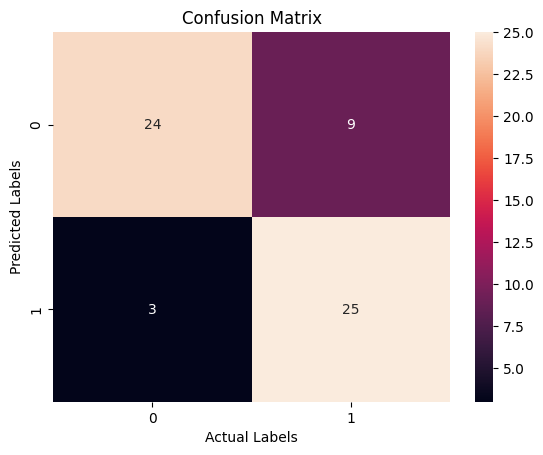

In [ ]:
print(confusion_matrix(y_test, y_pred1))
sns.heatmap(confusion_matrix(y_test, y_pred1),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)
acc_knn=accuracy_score(y_test,y_pred2)

In [ ]:
acc_knn

0.7868852459016393

[[23 10]
 [ 3 25]]


Text(0.5, 1.0, 'Confusion Matrix')

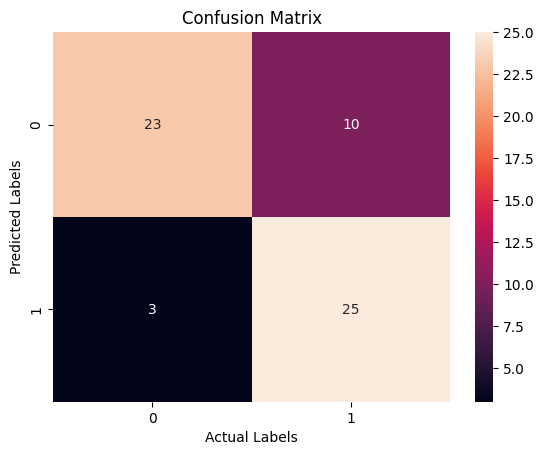

In [ ]:
print(confusion_matrix(y_test, y_pred2))
sns.heatmap(confusion_matrix(y_test, y_pred2),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred2)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        33
           1       0.71      0.89      0.79        28

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.81      0.79      0.79        61



In [ ]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred2)}")

F1 Score : 0.7936507936507937


In [ ]:
knn_f1_score = f1_score(y_test, y_pred2)
knn_f1_score

0.7936507936507937

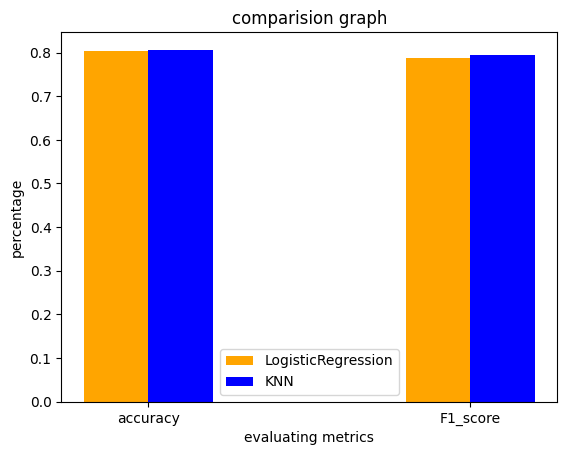

In [ ]:

# comparing differnt alogrithms performance metrices

x = ["accuracy","F1_score"]
y_acc = [acc_lr , acc_knn]
y_f1 = [lr_f1_score, knn_f1_score]
count = 0

x_pos1 = [ x.index(i) + 1 for i in x]
x_pos2 = [x_pos1[i] + 0.2 for i in range(len(x))]
x_pos3 = [x_pos1[i] + 0.1 for i in range(len(x))]
bar_width = 0.2

plt.xlabel("evaluating metrics")
plt.ylabel("percentage")
plt.title("comparision graph")

plt.bar(x_pos1 , y_acc , bar_width , color="orange" , label="LogisticRegression")
plt.bar(x_pos2, y_f1 , bar_width , color="blue" , label="KNN")

plt.xticks(x_pos3 , x)

plt.legend()
plt.show()

In [ ]:
score = []

for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.7868852459016393,
 0.7704918032786885,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377]

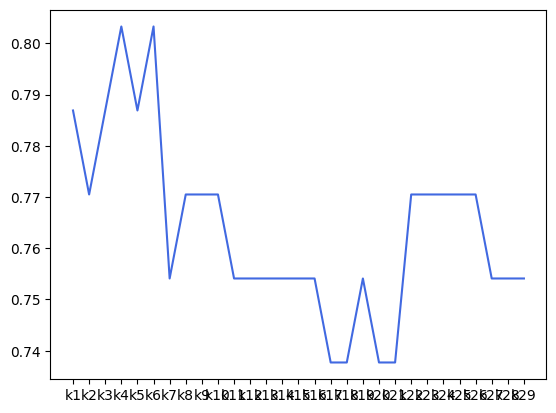

In [ ]:
x = ["k" + str(i) for i in range(1,30)]
plt.plot( x, score , color="royalblue")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GB = GaussianNB()
GB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred3 = GB.predict(X_test)

In [ ]:
acc_bayes = accuracy_score(y_test, y_pred3)
acc_bayes

0.7704918032786885

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred3)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        33
           1       0.69      0.89      0.78        28

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [ ]:
print(f"F1 Score : {f1_score(y_test, y_pred3)}")

F1 Score : 0.78125


In [ ]:
bayes_f1_score = f1_score(y_test, y_pred3)
bayes_f1_score

0.78125

[[22 11]
 [ 3 25]]


Text(0.5, 1.0, 'Confusion Matrix')

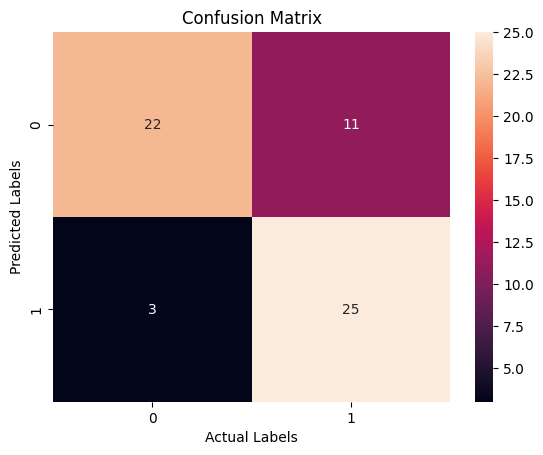

In [ ]:
print(confusion_matrix(y_test, y_pred3))
sns.heatmap(confusion_matrix(y_test, y_pred3),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [ ]:
# x = ["accuracy","F1_score" ]
# y_acc = [acc_lr , acc_knn , acc_bayes]
# y_f1 = [lr_f1_score, knn_f1_score , bayes_f1_score]
# count = 0

# x_pos1 = [ y_acc.index(i) + 1 for i in y_acc]
# x_pos2 = [x_pos1[i] + 0.2 for i in range(len(2))]
# x_pos3 = [x_pos1[i] + 0.4 for i in range(2)]
# x_label = [x_pos1[i] + 0.1 for i in range(len(x))]
# bar_width = 0.2

# plt.xlabel("evaluating metrics")
# plt.ylabel("percentage")
# plt.title("comparision graph")

# plt.bar(x_pos1 , y_acc , bar_width , color="orange" , label="LogisticRegression")
# plt.bar(x_pos2, y_f1 , bar_width , color="blue" , label="KNN")
# plt.bar(x_pos3, y_f1 , bar_width , color="red" , label="bayes")

# plt.xticks(x_label , x)

# plt.legend()
# plt.show()

In [ ]:
from sklearn.svm import SVC

In [ ]:
s_v_m = SVC(kernel = 'linear', random_state = 0)
s_v_m.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred4 = s_v_m.predict(X_test)

In [ ]:
# Accuracy
acc_svm = accuracy_score(y_test, y_pred4)
acc_svm

0.8032786885245902

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred4)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.74      0.89      0.81        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [ ]:
svm_f1_score = f1_score(y_test, y_pred4)
print(f"F1 Score : {svm_f1_score}")

F1 Score : 0.806451612903226


[[24  9]
 [ 3 25]]


Text(0.5, 1.0, 'Confusion Matrix')

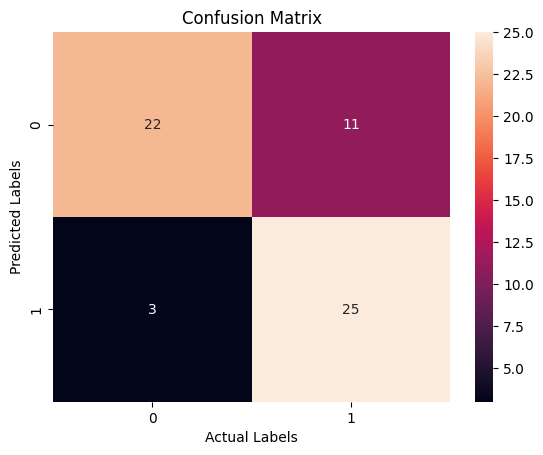

In [ ]:
print(confusion_matrix(y_test, y_pred4))
sns.heatmap(confusion_matrix(y_test, y_pred3),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

In [ ]:
# DecisionTree algorithm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree Classification
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred5 = DTC.predict(X_test)

In [ ]:
# Accuracy
acc_DTC = accuracy_score(y_test, y_pred5)
acc_DTC

0.7868852459016393

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred5)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



[[24  9]
 [ 4 24]]


Text(0.5, 1.0, 'Confusion Matrix')

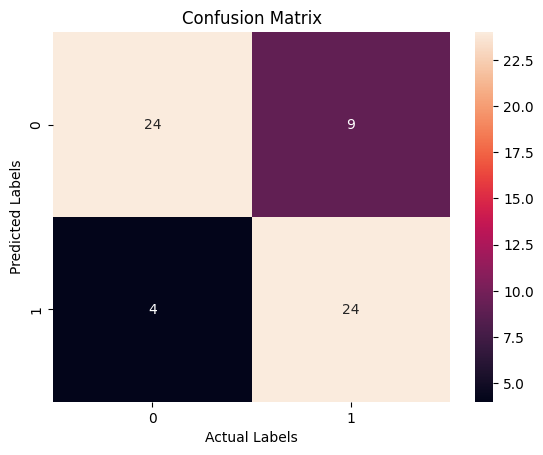

In [ ]:
print(confusion_matrix(y_test, y_pred5))
sns.heatmap(confusion_matrix(y_test, y_pred5),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

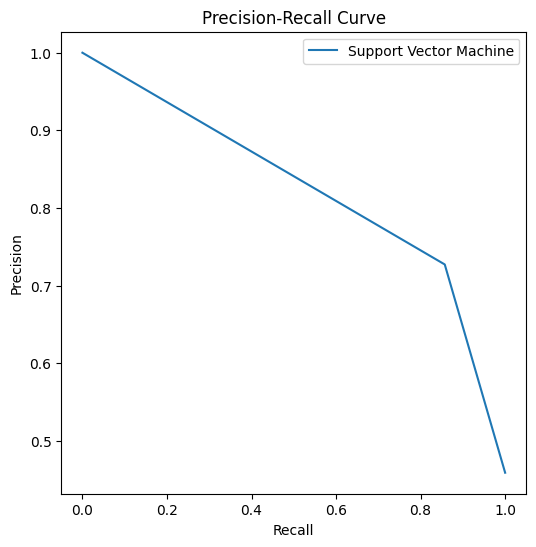

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = DTC.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend()

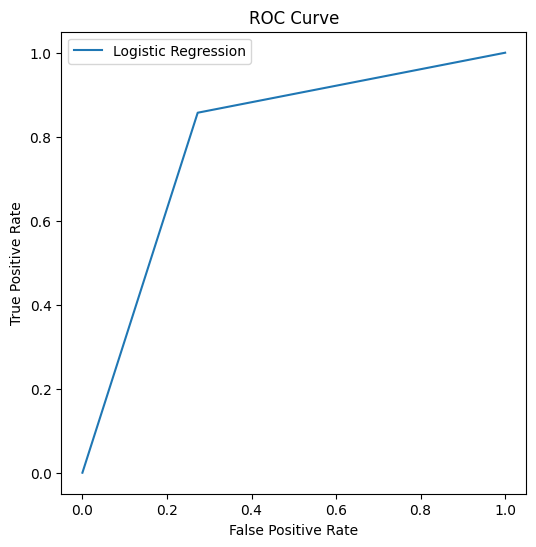

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = DTC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()

In [ ]:
# Train K-Nearest Neighbour model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RFC.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred6 = RFC.predict(X_test)

In [ ]:
# Accuracy
acc_RFC = accuracy_score(y_test, y_pred6)
acc_RFC

0.7868852459016393

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred6)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.73      0.86      0.79        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [ ]:
# F1 score
RFC_F1_score = f1_score(y_test, y_pred6)
print(f"F1 Score : {RFC_F1_score}")

F1 Score : 0.7868852459016394


[[24  9]
 [ 4 24]]


Text(0.5, 1.0, 'Confusion Matrix')

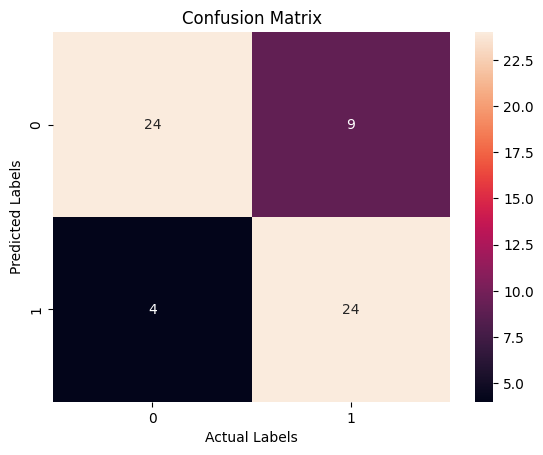

In [ ]:
print(confusion_matrix(y_test, y_pred6))
sns.heatmap(confusion_matrix(y_test, y_pred6),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

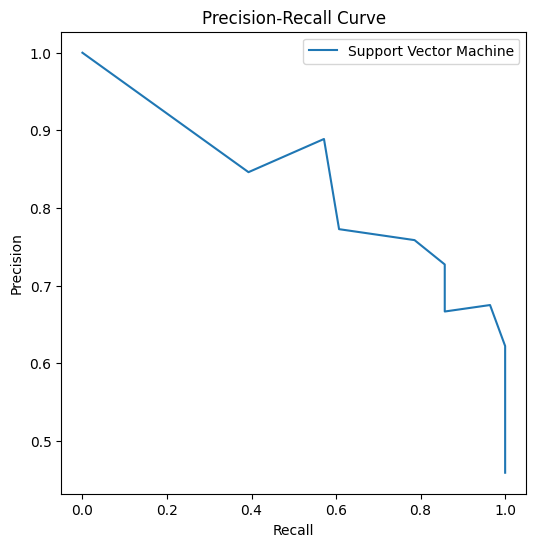

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = RFC.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend()

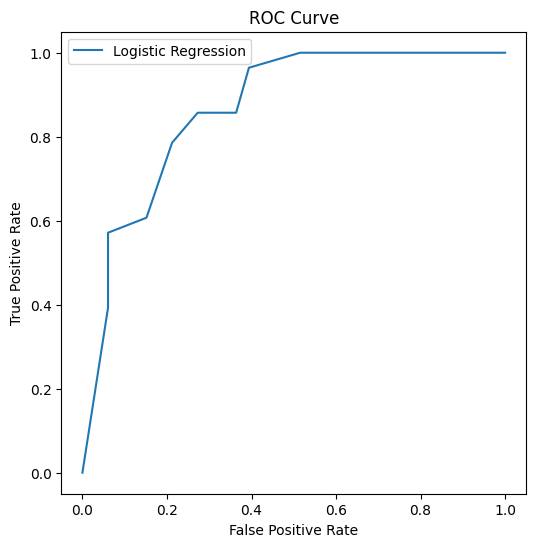

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = RFC.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()

In [ ]:
# gradientboosting algo
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

y_pred7 = gbc.predict(X_test)
accuracy_score(y_test,y_pred7)

0.7868852459016393

In [ ]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred7)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        33
           1       0.74      0.82      0.78        28

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
# F1 score
RFC_F1_score = f1_score(y_test, y_pred7)
print(f"F1 Score : {RFC_F1_score}")

F1 Score : 0.7796610169491526


[[25  8]
 [ 5 23]]


Text(0.5, 1.0, 'Confusion Matrix')

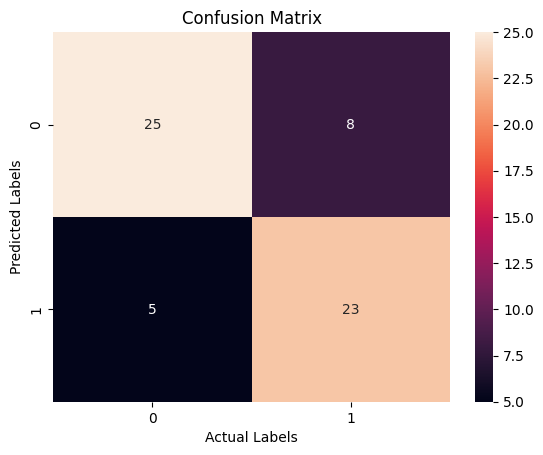

In [ ]:
print(confusion_matrix(y_test, y_pred7))
sns.heatmap(confusion_matrix(y_test, y_pred7),annot=True)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix")

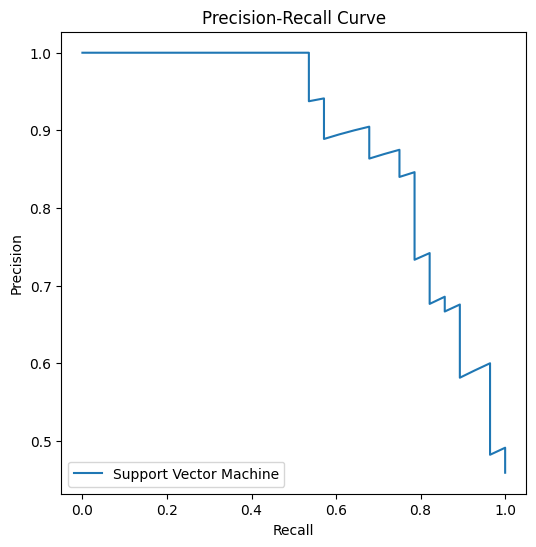

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = gbc.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Support Vector Machine')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend()

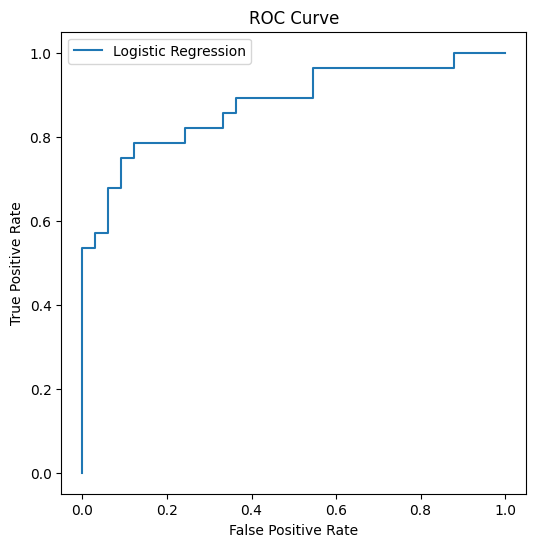

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = gbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Logistic Regression')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend()

In [ ]:
final_data = pd.DataFrame({'Models':['LR','KNN','Gaussian','SVM','DT','RF',"gbc"],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100,
                                accuracy_score(y_test,y_pred7)*100]})

<BarContainer object of 7 artists>

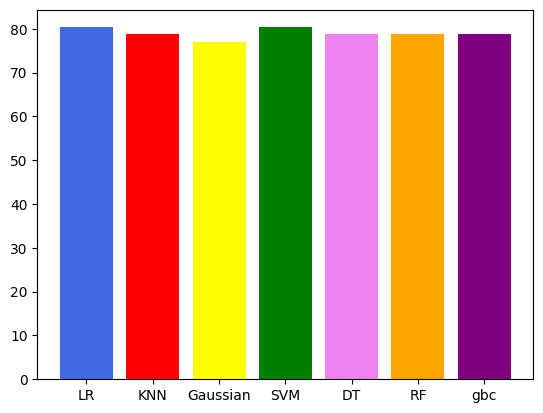

In [ ]:
import seaborn as sns
plt.bar(final_data["Models"], final_data["ACC"] , color=["royalblue", "red" , "yellow", "green","violet", "orange","purple"])

In [ ]:
X = data.drop('output',axis=1)
y = data['output']

In [ ]:
X.head()

,age,sex,trtbps,chol,thalachh,oldpeak,cp_0,cp_1,cp_2,cp_3,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,True,False,False,False,...,True,True,False,False,False,False,False,False,True,False


In [ ]:
RFC.fit(X,y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'trtbps':125,
    'chol':212,
    'thalachh':168,
    'oldpeak':1.0,
    'cp_0':1,
    'cp_1':0,
    'cp_2':0,
    'cp_3':0,
    'fbs_0':1,
    'fbs_1':0,
    'restecg_0':1,
    'restecg_1':0,
    'restecg_2':0,
    'exng_0':1,
    'exng_1':0,
    'slp_0':0,
    'slp_1':1,
    'slp_2':0,
    'caa_0':0,
    'caa_1':1,
    'caa_2':0,
    'caa_3':0,
    'caa_4':0,
    'thall_0':0,    
    'thall_1':0,    
    'thall_2':1,    
    'thall_3':1,    
},index=[0])

In [ ]:
# new_data = pd.get_dummies(new_data, columns=["cp","fbs","restecg","exng","slp","caa","thall"])

In [ ]:
new_data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,cp_0,cp_1,cp_2,cp_3,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,52,1,125,212,168,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
new_data.shape

(1, 29)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SC = StandardScaler()

In [ ]:
# new_data["age","trtbps","chol","thalachh","oldpeak"] = SC.fit_transform(new_data["age","trtbps","chol","thalachh","oldpeak"])

In [ ]:
y_pred8 = RFC.predict(new_data)

In [ ]:
if y_pred8[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [ ]:
import joblib

In [ ]:
joblib.dump(RFC,'model_joblib_heart')

['model_joblib_heart']

In [ ]:
model = joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)

array([0], dtype=int64)

In [ ]:
from tkinter import *
import joblib

In [ ]:
master = Tk()
master.title("Heart Disease Prediction System")

''

In [ ]:
label = Label(master, text = "Heart Disease Prediction System"). grid(row=0,columnspan=2)

In [ ]:
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

In [ ]:
X = data.drop('output',axis=1)
y = data['output']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_70 = classifier.predict(X_test)

In [ ]:
acc_LR_70 = accuracy_score(y_test ,y_pred_70)
acc_LR_70

0.8241758241758241

In [ ]:
s_v_m.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_70_svm = s_v_m.predict(X_test)


In [ ]:
acc_SVM_70 = accuracy_score(y_test, y_pred_70_svm)
acc_SVM_70

0.8131868131868132

In [ ]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_70_DTC = DTC.predict(X_test)

In [ ]:
acc_DTC_70 = accuracy_score(y_test, y_pred_70_svm)
acc_DTC_70

0.8131868131868132

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred_75 = classifier.predict(X_test)
acc_LR_75 = accuracy_score(y_test ,y_pred_75)
acc_LR_75

0.8026315789473685

In [ ]:
s_v_m.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred_75_svm = s_v_m.predict(X_test)
acc_SVM_75 = accuracy_score(y_test, y_pred_75_svm)
acc_SVM_75

0.8157894736842105

In [ ]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_75_DTC = DTC.predict(X_test)
acc_DTC_75 = accuracy_score(y_test, y_pred_75_DTC)
acc_DTC_75

0.75

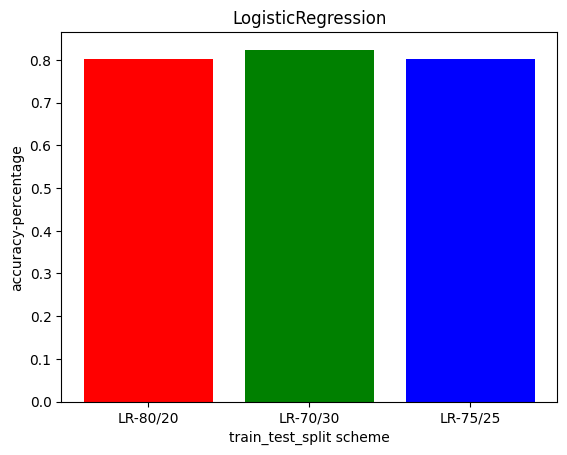

In [ ]:
x_axis =["LR-80/20" , "LR-70/30" , "LR-75/25"]
y_axis=[acc_lr , acc_LR_70 , acc_LR_75]
plt.bar(x_axis,y_axis , color=["r","g","b"])
plt.title("LogisticRegression")
plt.xlabel("train_test_split scheme")
plt.ylabel("accuracy-percentage")
plt.show()

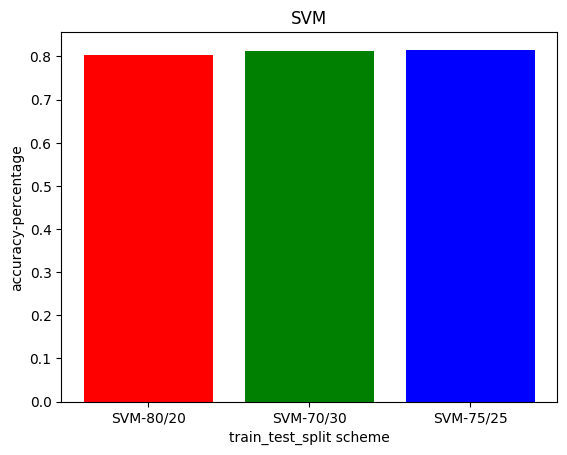

In [ ]:
x_axis =["SVM-80/20" , "SVM-70/30" , "SVM-75/25"]
y_axis=[acc_svm , acc_SVM_70 , acc_SVM_75]
plt.bar(x_axis,y_axis , color=["r","g","b"])
plt.title("SVM")
plt.xlabel("train_test_split scheme")
plt.ylabel("accuracy-percentage")
plt.show()

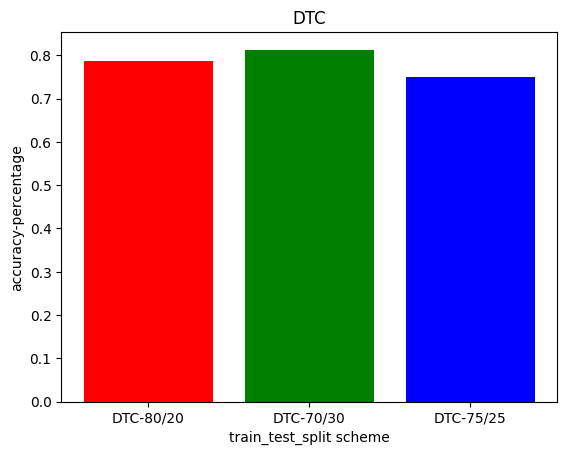

In [ ]:

x_axis =["DTC-80/20" , "DTC-70/30" , "DTC-75/25"]
y_axis=[acc_DTC , acc_DTC_70 , acc_DTC_75]
plt.bar(x_axis,y_axis , color=["r","g","b"])
plt.title("DTC")
plt.xlabel("train_test_split scheme")
plt.ylabel("accuracy-percentage")
plt.show()